# **Continuous Wavelet Transform**

## **Preamble**

In [583]:
import numpy as np
from scipy import signal
from scipy import stats
from scipy import constants
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk, rectangle 
import pywt
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [706]:
# generate a sample signal by summing two sinusoids
fs = 100
T = 10
t_ax = np.arange(0,10,1/fs)
noise_var = 0.5
f1 = 1
f2 = 2
ph2 = np.pi/4
x1 = np.sin(2 * np.pi * f1 * t_ax)
x2 = np.sin(2 * np.pi * f2 * t_ax + ph2)
x3 = x1 + x2 + noise_var * np.random.random(len(t_ax))

In [707]:
# zscore, keeping mean and SD for rescaling,
mean_x3 = np.mean(x3)
std_x3 = np.std(x3)
x3 = stats.zscore(x3)

Text(0.5, 1.0, 'original')

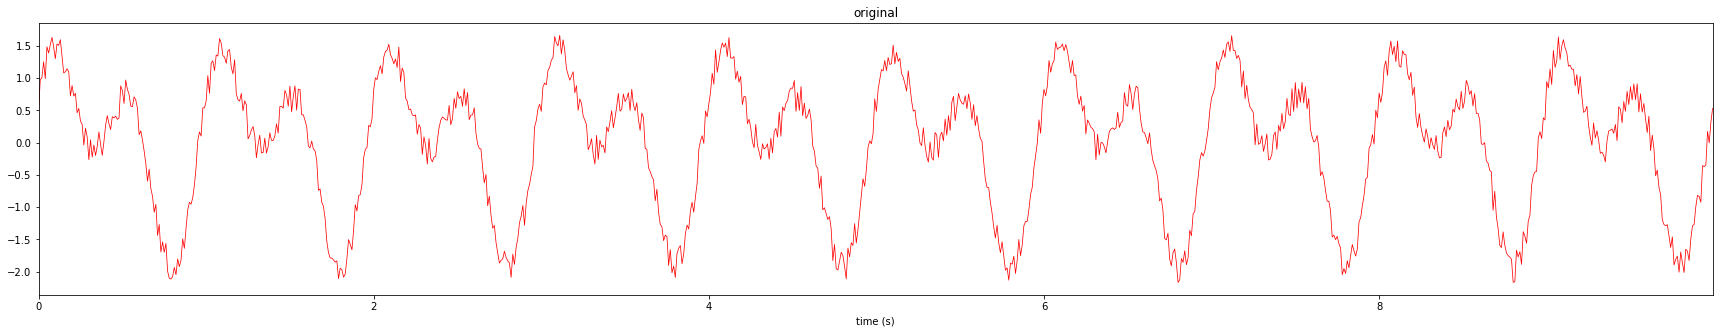

In [708]:
# plot signal
fig = plt.figure(figsize=(30,5))
plt.plot(t_ax, x3, c='r', lw=0.75)
plt.xlim([0, t_ax[-1]])
plt.xlabel('time (s)')
plt.title(f'original')

In [709]:
# perform CWT on signal with several different wavelets
wavlist = pywt.wavelist(kind='continuous')
widths = np.concatenate([np.arange(0.1,1,0.1),  np.arange(1,500)])
cwtmat_all = np.empty([len(wavlist), len(widths), len(inirs_filt)])
freqs_all = np.empty([len(wavlist), len(widths)])
for wav_idx, wav in enumerate(wavlist):
    cwtmat, freqs = pywt.cwt(x3, scales=widths, wavelet=wav, sampling_period=1/f_s)
    cwtmat = np.abs(cwtmat)
    cwtmat_all[wav_idx, :, :] = np.real(cwtmat)
    freqs_all[wav_idx, :] = freqs

/home/patrick-thinkpad/anaconda3/envs/patrick-env/lib/python3.8/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/home/patrick-thinkpad/anaconda3/envs/patrick-env/lib/python3.8/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/home/patrick-thinkpad/anaconda3/envs/patrick-env/lib/python3.8/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family shan, without parameters specifie

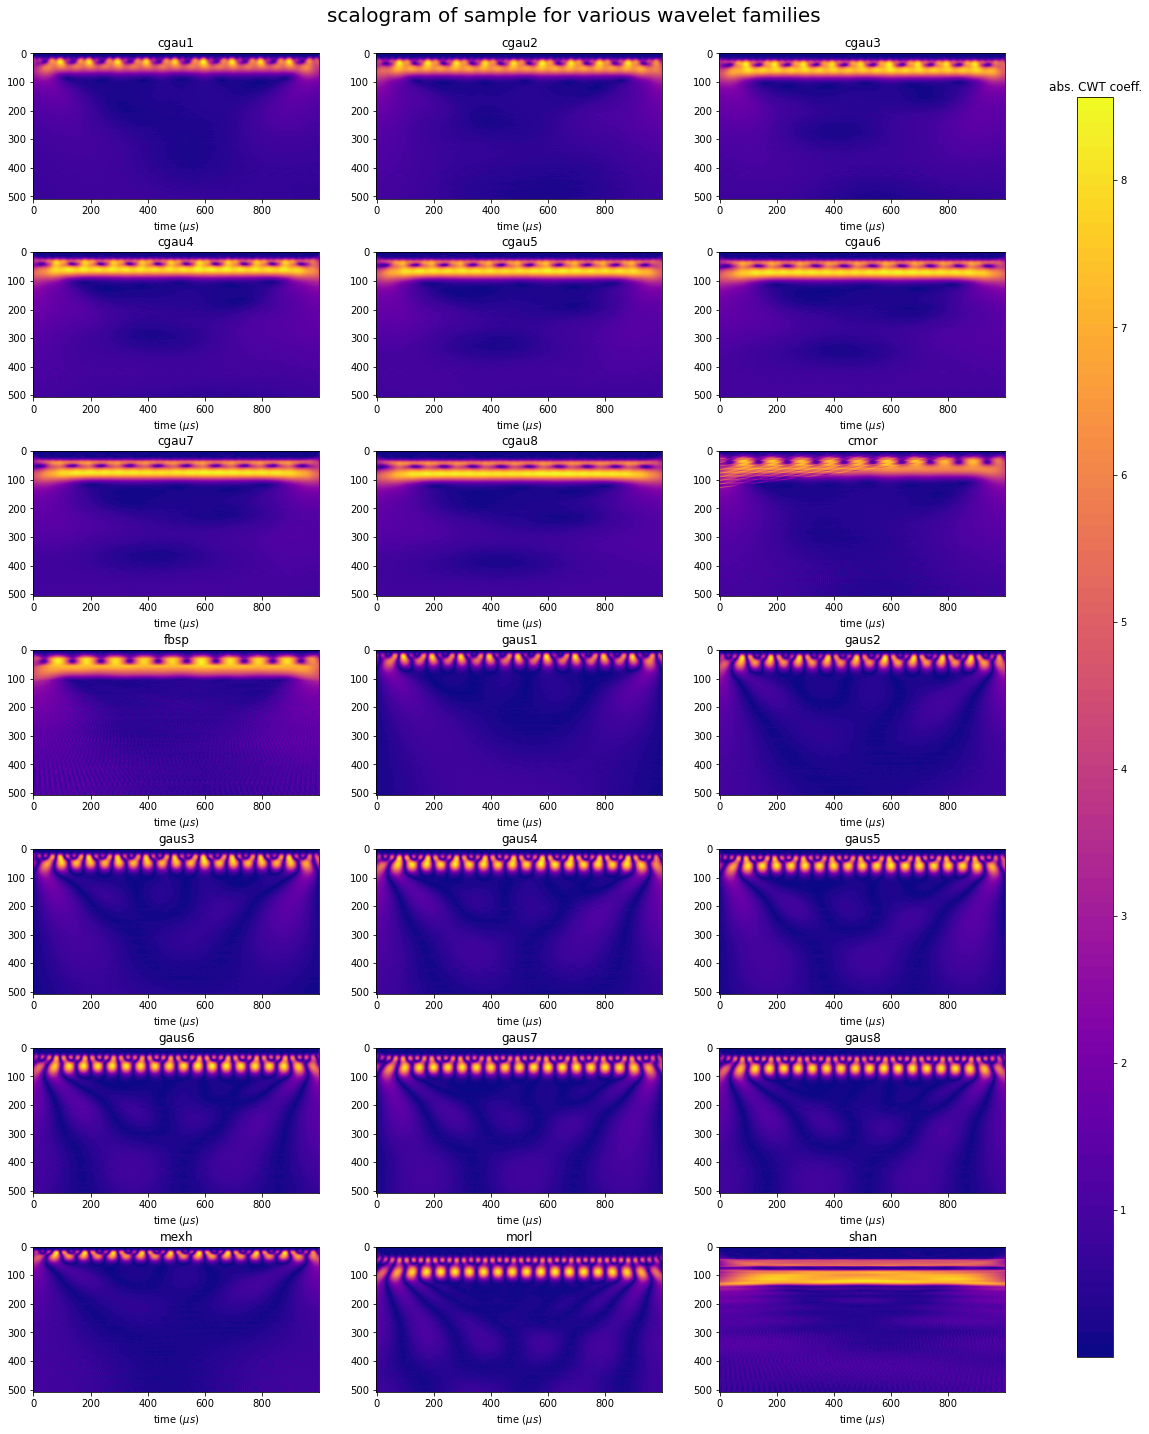

In [710]:
# plot scalograms
len(wavlist)
ytick_idxs = np.arange(0,len(freqs), 50)
colour_map = cm.get_cmap('plasma', 100)
fig, ax = plt.subplots(7, 3, figsize=(20,25))
for wav_idx, wav in enumerate(wavlist):
    row = wav_idx // 3
    col = wav_idx % 3
    im = ax[row, col].imshow(cwtmat_all[wav_idx, :, :], cmap=colour_map)
    ax[row, col].set_xlabel('time ($\mu s$)')
    ax[row, col].set_title(f'{wav}')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cbar_ax.set_title('abs. CWT coeff.')
fig.colorbar(im, cax=cbar_ax)
plt.suptitle(f'scalogram of {signal_name} for various wavelet families', x=0.5, y=0.9, fontsize=20)
fig.patch.set_facecolor('w')
if plot_saving == True:
    plt.savefig(f'plots/wavelets/scalogram_array_{signal_name}.png', dpi=500)

In [711]:
# choose wavelet to use and perform CWT
wavelet_fam = 'shan'
cwtmat, freqs = pywt.cwt(x3, scales=widths, wavelet=wavelet_fam, sampling_period=1/f_s)

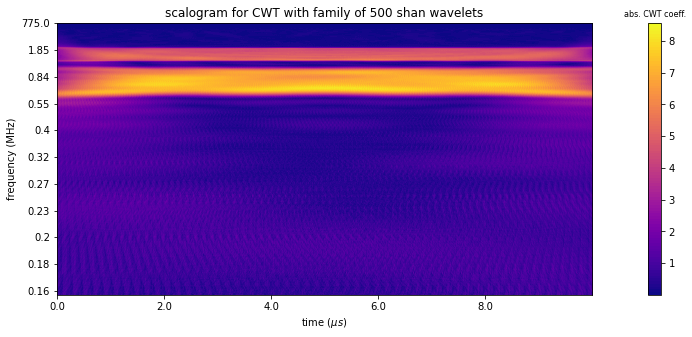

In [712]:
# plot result
fig = plt.figure(figsize=(20,5))
ytick_idxs = np.arange(0,len(freqs), 50)
colour_map = cm.get_cmap('plasma', 100)
im = plt.imshow(np.abs(cwtmat), cmap=colour_map)
plt.xlabel('time ($\mu s$)')
plt.ylabel('frequency (MHz)')
plt.xticks(ticks=np.arange(0,1000,200), labels=np.arange(0,1000,200)/(f_s) * 1e6)
plt.yticks(ticks=ytick_idxs, labels=np.around(freqs[ytick_idxs] / 1e6, decimals=2))
cbar = plt.colorbar(im)
cbar.ax.set_title('abs. CWT coeff.',fontsize=8)
plt.title(f'scalogram for CWT with family of 500 {wavelet_fam} wavelets')
fig.patch.set_facecolor('w')
if plot_saving == True:
    plt.savefig(f'plots/wavelets/scalogram_{signal_name}_{wavelet_fam}.png', dpi=500)

In [713]:
# extract ridges
ridge_max, _ = detect_ridges(np.abs(cwtmat), sigma=2)

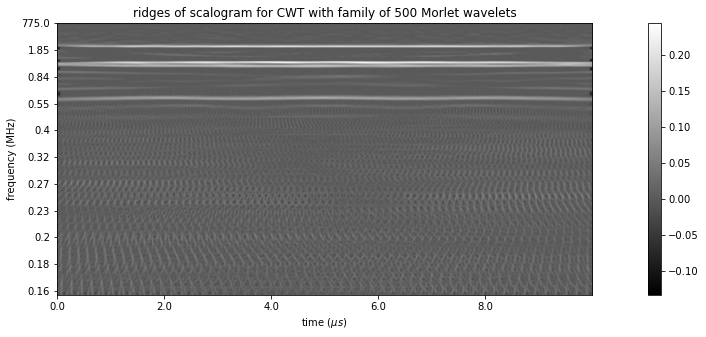

In [714]:
# plot ridges
fig = plt.figure(figsize=(20,5))
ytick_idxs = np.arange(0,len(freqs), 50)
colour_map = cm.get_cmap('plasma', 100)
im = plt.imshow(ridge_max, cmap='gray')
plt.xlabel('time ($\mu s$)')
plt.ylabel('frequency (MHz)')
plt.xticks(ticks=np.arange(0,1000,200), labels=np.arange(0,1000,200)/(f_s) * 1e6)
plt.yticks(ticks=ytick_idxs, labels=np.around(freqs[ytick_idxs] / 1e6, decimals=2))
cbar = plt.colorbar(im)
plt.title('ridges of scalogram for CWT with family of 500 Morlet wavelets')
fig.patch.set_facecolor('w')
if plot_saving == True:
    plt.savefig(f'plots/wavelets/scalogram_{signal_name}_{wavelet_fam}.png', dpi=500)

In [335]:
# generate mask
thresh = 0.05
cwt_mask = ridge_max > thresh

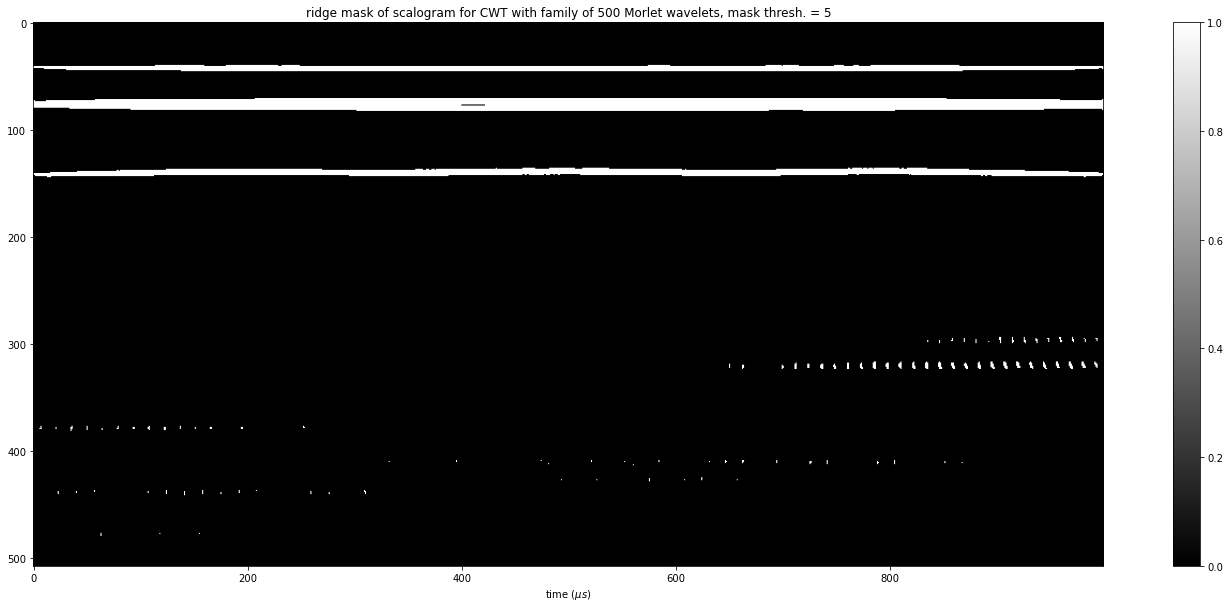

In [336]:
# plot mask
fig = plt.figure(figsize=(25,10))
ytick_idxs = np.arange(0,len(freqs), 50)
colour_map = cm.get_cmap('plasma', 100)
im = plt.imshow(cwt_mask, cmap='gray')
plt.xlabel('time ($\mu s$)')
cbar = plt.colorbar(im)
plt.title(f'ridge mask of scalogram for CWT with family of 500 Morlet wavelets, mask thresh. = {ridge_thresh}')
fig.patch.set_facecolor('w')
if plot_saving == True:
    plt.savefig(f'plots/wavelets/ridge_mask_scalogram_{signal_name}_{wavelet_fam}.png', dpi=500)

In [337]:
# apply morphological filtering to mask to clean
footprint = disk(2)
cwt_mask_clean = dilation(cwt_mask, footprint)

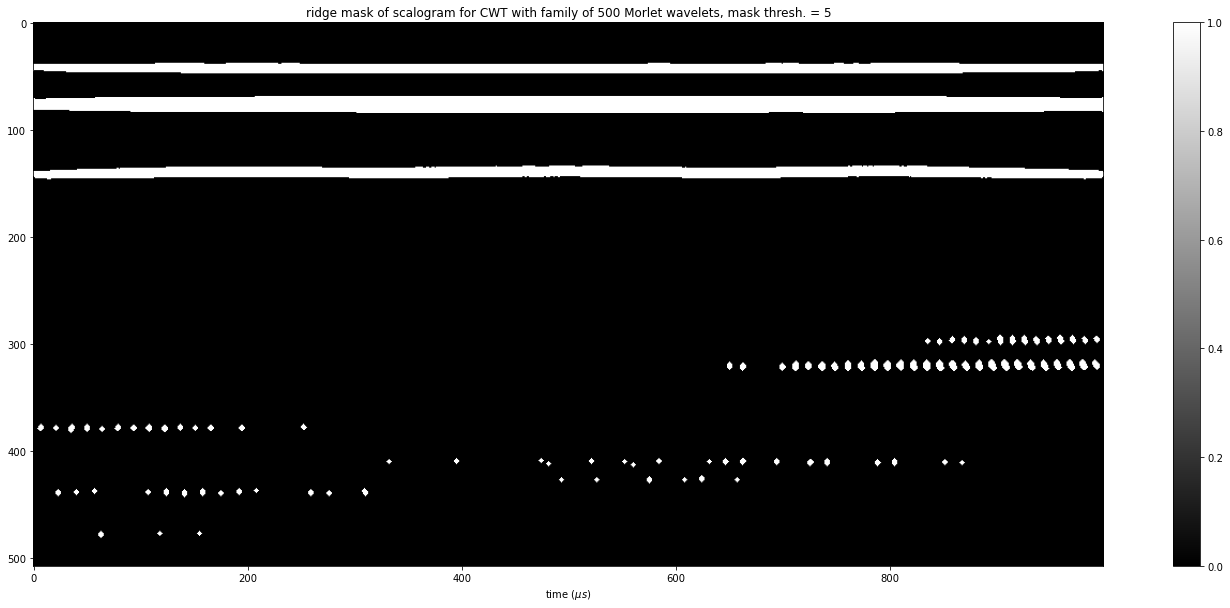

In [338]:
# plot mask
fig = plt.figure(figsize=(25,10))
ytick_idxs = np.arange(0,len(freqs), 50)
colour_map = cm.get_cmap('plasma', 100)
im = plt.imshow(cwt_mask_clean, cmap='gray')
plt.xlabel('time ($\mu s$)')
cbar = plt.colorbar(im)
plt.title(f'ridge mask of scalogram for CWT with family of 500 Morlet wavelets, mask thresh. = {ridge_thresh}')
fig.patch.set_facecolor('w')
if plot_saving == True:
    plt.savefig(f'plots/wavelets/ridge_mask_scalogram_{signal_name}_{wavelet_fam}.png', dpi=500)

In [339]:
# apply mask
cwtmat_masked = np.ma.masked_array(cwtmat, mask=cwt_mask_clean)

In [340]:
# reconstruct signal (as per https://github.com/PyWavelets/pywt/issues/328)
wf = pywt.ContinuousWavelet('shan').wavefun()
y_0 = mwf[0][np.argmin(np.abs(wf[1]))]
r_sum = np.transpose(np.sum(np.transpose(cwtmat_masked)/ widths ** 0.5, axis=-1))
x3_recon = r_sum * (1 / y_0)

/tmp/ipykernel_72590/170507091.py:2: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  wf = pywt.ContinuousWavelet('shan').wavefun()


In [341]:
# rescale signals
x3_recon = stats.zscore(x3_recon)
x3_recon = (x3_recon * std_x3) + mean_x3
x3 = (x3 * std_x3) + mean_x3

/home/patrick-thinkpad/anaconda3/envs/patrick-env/lib/python3.8/site-packages/numpy/ma/core.py:2787: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


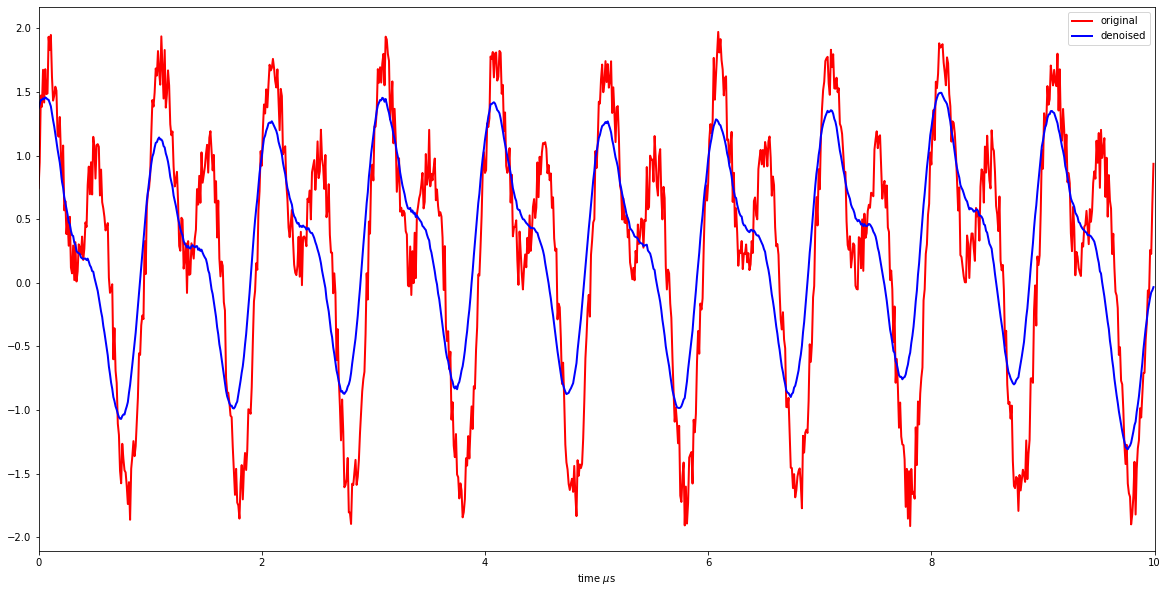

In [342]:
# plot reconstructed signal
plt.figure(figsize=(20,10))
plt.plot(time_ax_us[:samples_per_sweep], x3, c='r', label='original', lw=2)
plt.plot(time_ax_us[:samples_per_sweep], x3_recon, c='b', label='denoised', lw=2)
plt.xlabel('time $\mu$s')
plt.xlim([0,time_ax_us[samples_per_sweep]])
# plt.xlim([0,1]))
plt.legend()